## Data gathering and Importing libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"Diabetics.csv")


## Descriptive Analysis

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id,split
0,0,84,82,31,125,38.2,0.233,23,0,1,2.279165
1,0,145,0,0,0,44.2,0.630,31,1,2,0.751868
2,1,139,62,41,480,40.7,0.536,21,0,4,0.928773
3,4,125,70,18,122,28.9,1.144,45,1,11,0.134273
4,2,84,50,23,76,30.4,0.968,21,0,26,1.587001


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id,split
590,4,120,68,0,0,29.6,0.709,34,0,1988,-0.055302
591,4,110,66,0,0,31.9,0.471,29,0,1989,-0.098447
592,1,79,60,42,48,43.5,0.678,23,0,1994,-0.331913
593,8,179,72,42,130,32.7,0.719,36,1,1996,1.249950
594,0,129,110,46,130,67.1,0.319,26,1,1998,0.392048


In [5]:
df.shape

(595, 11)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id,split
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,3.788235,121.174790,68.105882,21.428571,81.021849,32.217311,0.454869,32.594958,0.331092,1003.719328,0.032814
std,3.352801,30.304788,20.385606,16.315581,107.744309,8.907400,0.285681,11.319316,0.471002,580.881369,0.990622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000,0.000000,1.000000,-2.882502
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.240000,24.000000,0.000000,504.500000,-0.644610
50%,3.000000,118.000000,72.000000,24.000000,50.000000,32.100000,0.375000,28.000000,0.000000,997.000000,0.066890
75%,6.000000,141.000000,80.000000,32.000000,128.500000,37.200000,0.606000,39.000000,1.000000,1498.500000,0.717113
max,17.000000,197.000000,114.000000,110.000000,680.000000,67.100000,1.731000,69.000000,1.000000,1998.000000,2.923840


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Id                          0
split                       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               595 non-null    int64  
 1   Glucose                   595 non-null    int64  
 2   BloodPressure             595 non-null    int64  
 3   SkinThickness             595 non-null    int64  
 4   Insulin                   595 non-null    int64  
 5   BMI                       595 non-null    float64
 6   DiabetesPedigreeFunction  595 non-null    float64
 7   Age                       595 non-null    int64  
 8   Outcome                   595 non-null    int64  
 9   Id                        595 non-null    int64  
 10  split                     595 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 51.3 KB


## Data Visualizations

<AxesSubplot:xlabel='Outcome', ylabel='count'>

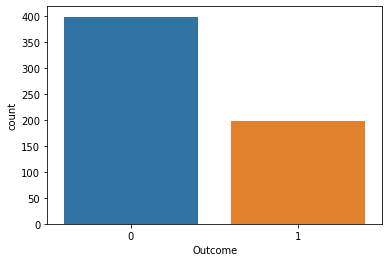

In [9]:
sns.countplot(x = 'Outcome',data = df)

<ipython-input-10-0a65f9928071>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2), 3, j + 1)


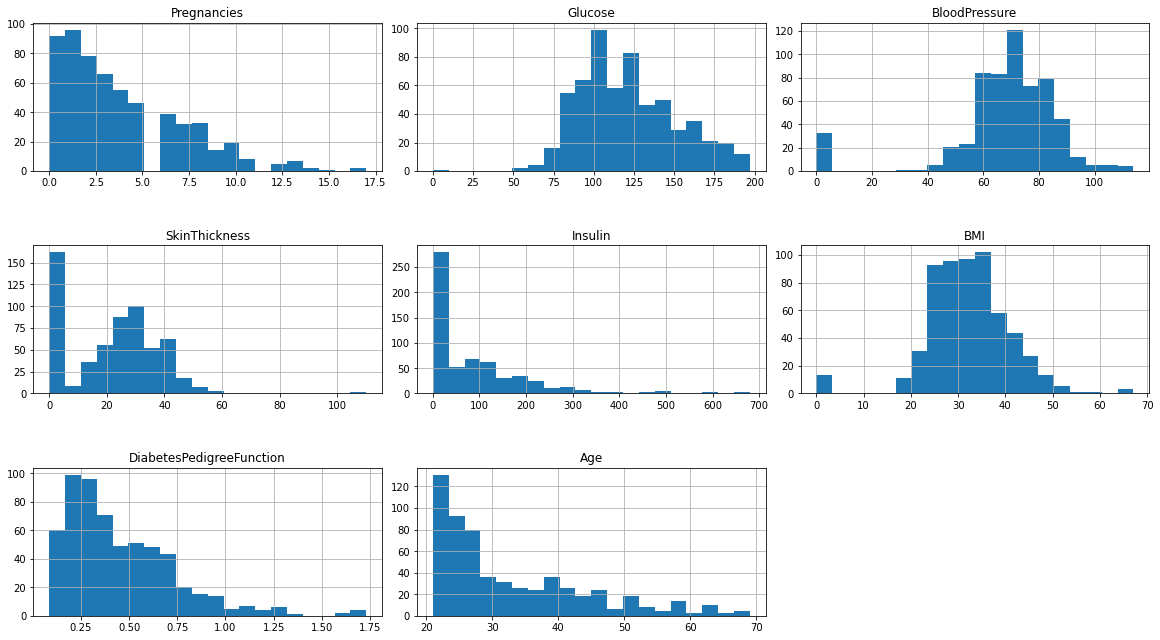

In [10]:
# Histogram of each feature
import itertools
col = df.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)
for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

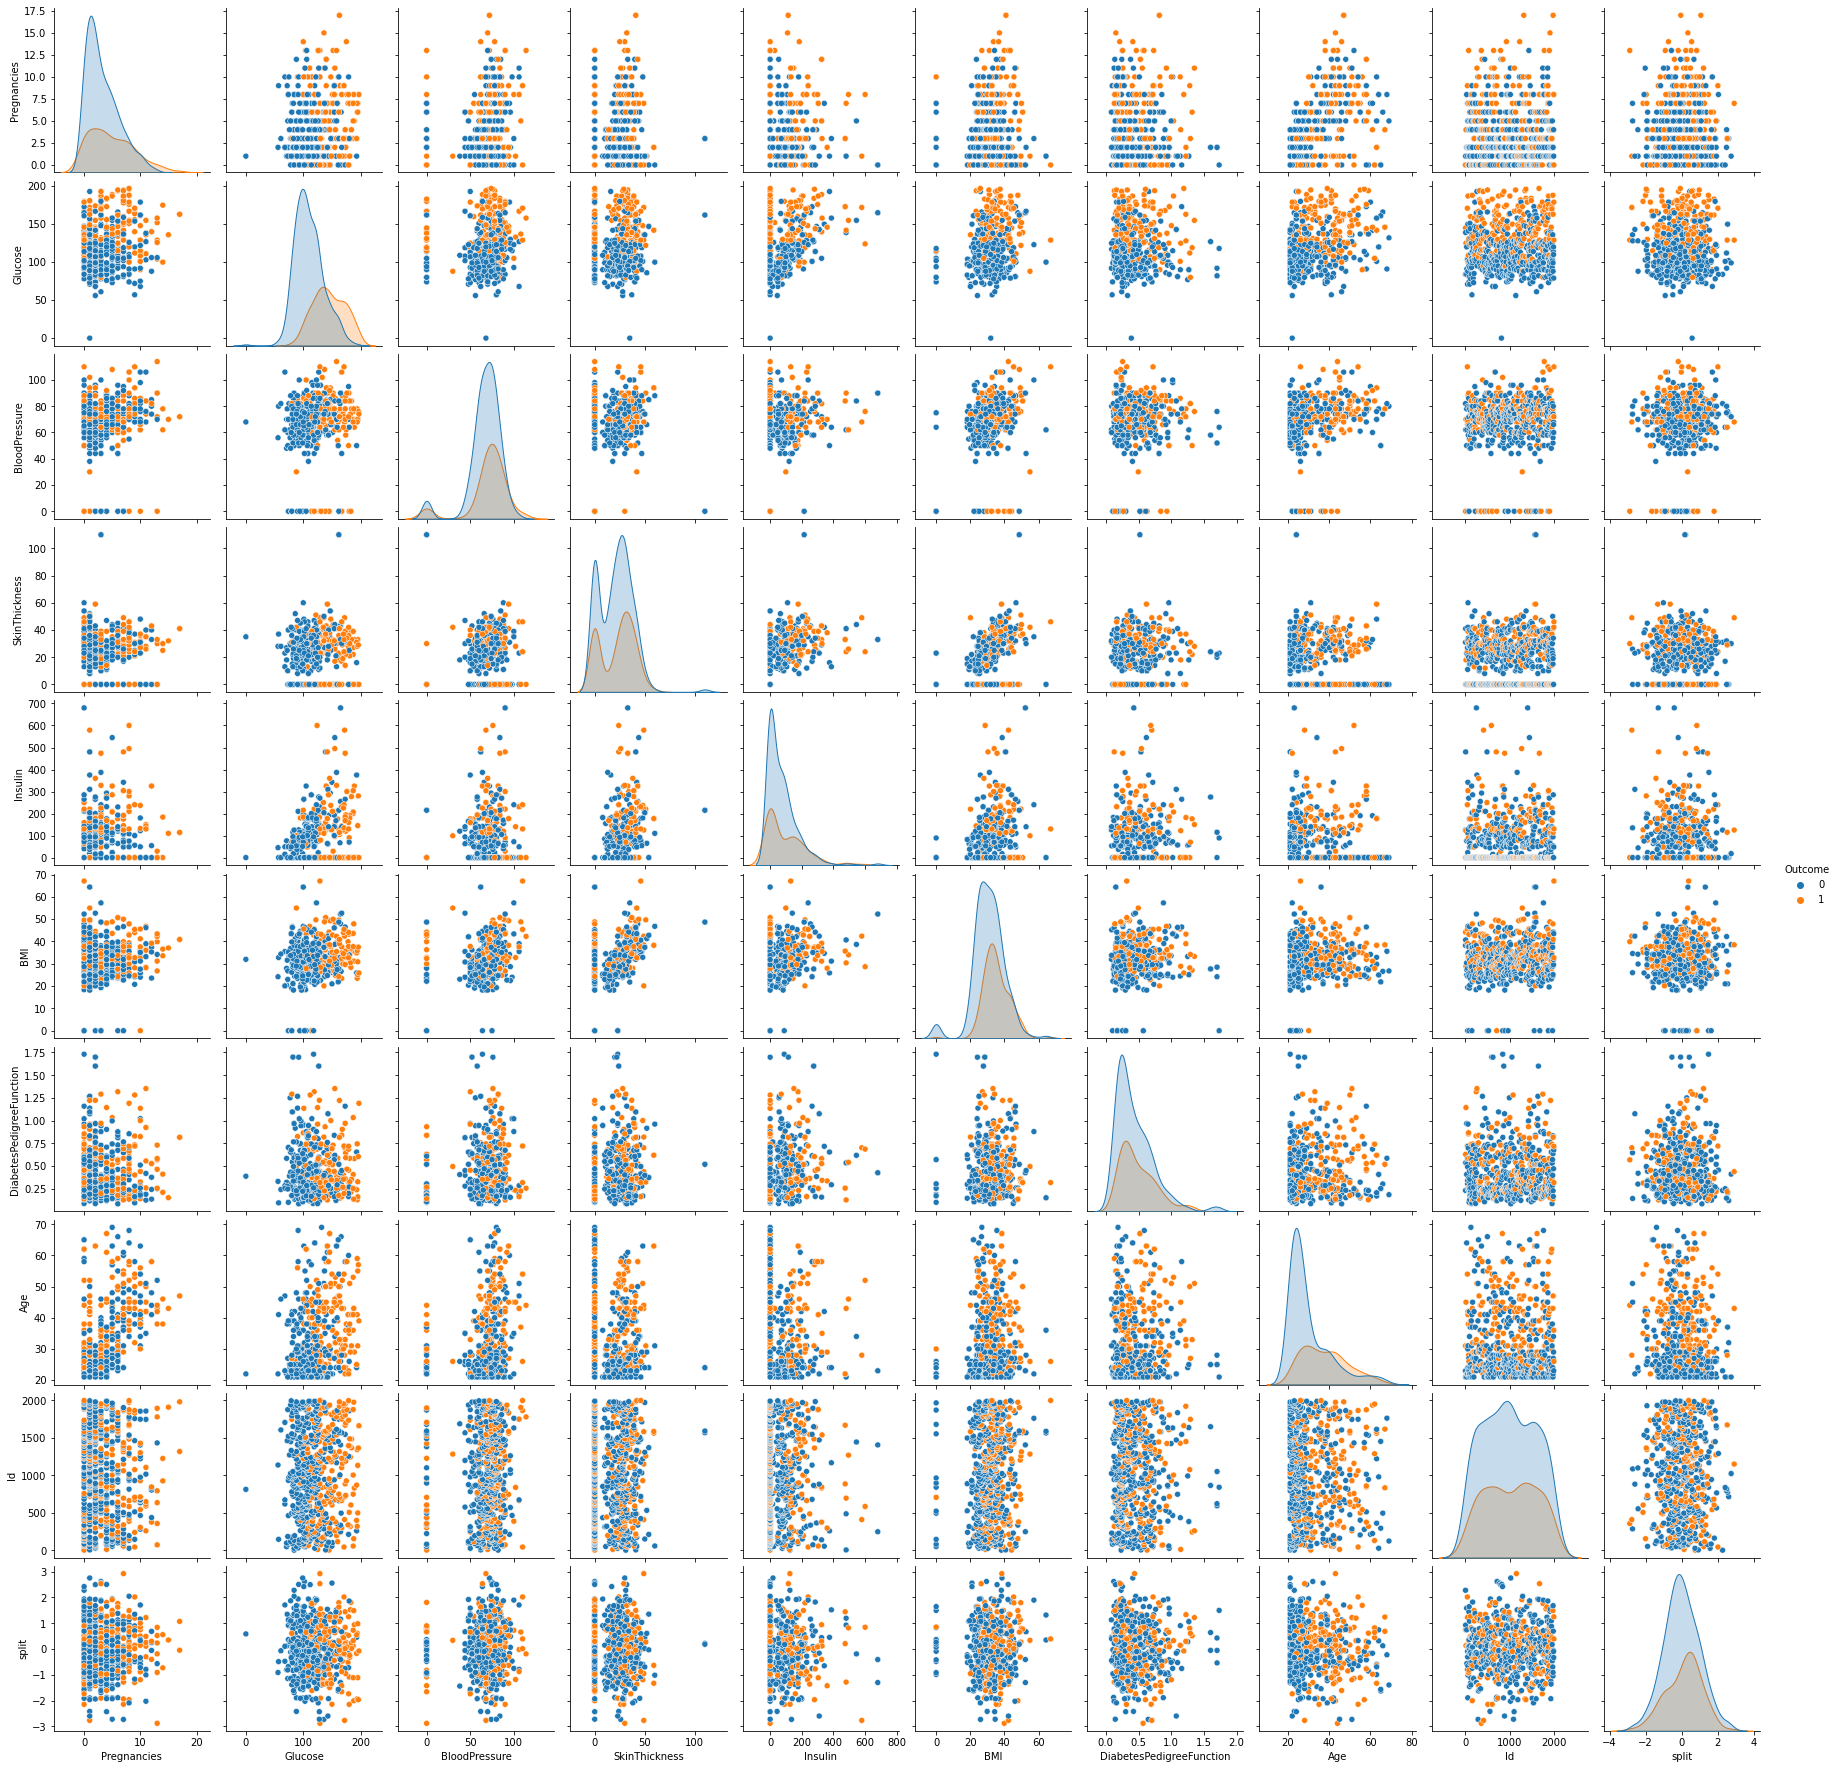

In [11]:
# Pairplot 
sns.pairplot(data = df, hue = 'Outcome')
plt.show()

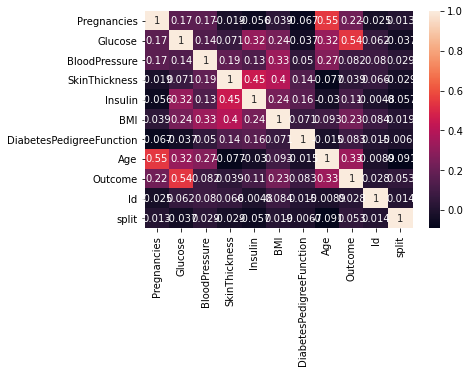

In [12]:
# Heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()


## Data Preprocessing

In [13]:
# Replacing zero values with NaN
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)
# Count of NaN
df.isnull().sum()

Pregnancies                   0
Glucose                       1
BloodPressure                33
SkinThickness               162
Insulin                     266
BMI                          13
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Id                            0
split                         0
dtype: int64

In [14]:
# Replacing NaN with mean values
df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)

In [15]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df_scaled = sc.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)

In [16]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = df_scaled.iloc[:, [1, 4, 5, 7]].values
Y = df_scaled.iloc[:, 8].values

In [17]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = df['Outcome'] )

In [18]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (476, 4)
X_test shape: (119, 4)
Y_train shape: (476,)
Y_test shape: (119,)


## Data Modelling

In [19]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)
# Making predictions on test dataset
Y_pred = svc.predict(X_test)

## Model Evaluation

Accuracy: 76.47058823529412


<AxesSubplot:>

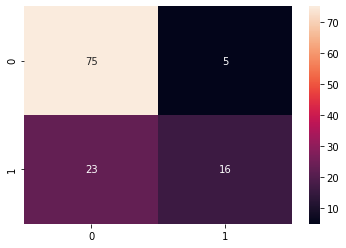

In [21]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: " + str(accuracy * 100))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [22]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

         0.0       0.77      0.94      0.84        80
         1.0       0.76      0.41      0.53        39

    accuracy                           0.76       119
   macro avg       0.76      0.67      0.69       119
weighted avg       0.76      0.76      0.74       119



 Three metrics accuracy_score, confusion matrix and classification report for evaluating our model.